# RF on biofilm data with feature importance using barplot and SHAP

# Import Libraries
Import the usual libraries for pandas and plotting. You can import sklearn later on.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

** Use pandas to read ExtractedFeatures_all.csv as a dataframe called data.**

In [42]:
data1 = pd.read_csv('ExtractedFeatures_standardized_monoB_clinical_Testing_inVivo_inVitro_SepLabel.csv')

** Check out the info(), head(), and describe() methods on data.**

In [43]:
print(data1['Label'])

0         HFB
1         HFB
2         HFB
3         HFB
4         HFB
        ...  
1195    SPB-C
1196    SPB-C
1197    SPB-C
1198    SPB-C
1199    SPB-C
Name: Label, Length: 1200, dtype: object


# Train Test Split
Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [44]:
from sklearn.model_selection import train_test_split

# manually defining 1000 training and 200 test data 

In [45]:
X = data1.drop('Label',axis=1)
y = data1['Label']
X_train = X #training data
y_train = y #training label
X_train
y_train

0         HFB
1         HFB
2         HFB
3         HFB
4         HFB
        ...  
1195    SPB-C
1196    SPB-C
1197    SPB-C
1198    SPB-C
1199    SPB-C
Name: Label, Length: 1200, dtype: object

In [5]:
data2 = pd.read_csv('ExtractedFeatures_standardized_TM_normal_inflammed.csv')
X2 = data2.drop('Label',axis=1)
y2 = data2['Label']
X_test = X2 #testing data
y_test = y2 #testing label
X_test
y_test

0      HFB
1      HFB
2      HFB
3      HFB
4      HFB
      ... 
995    SPB
996    SPB
997    SPB
998    SPB
999    SPB
Name: Label, Length: 1000, dtype: object

# Training the Random Forest model
Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=600)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# Random Forest Built-in Feature Importance

The Random Forest algorithm has built-in feature importance which can be computed in two ways:

(a) Gini importance (or mean decrease impurity), which is computed from the Random Forest structure. Let’s look how the Random Forest is constructed. It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor).

It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. 

The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. What is more, in the case of correlated features it can select one of the feature and neglect the importance of the second one (which can lead to wrong conclusions).

(b) Mean Decrease Accuracy - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package. The very similar to this method is permutation based importance described below in this post.

# Determine feature importance values

In [49]:
import numpy as np
 
importances = rfc.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = data1.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Kurtosis                       0.106929
 2) GLCM13                         0.083310
 3) Skewness                       0.076316
 4) GLCM5                          0.067284
 5) GLCM6                          0.052151
 6) LBP10                          0.047433
 7) GLCM1                          0.037724
 8) Label                          0.037449
 9) LBP2                           0.035569
10) LBP6                           0.034519
11) LBP1                           0.029304
12) GLCM3                          0.027483
13) GLCM9                          0.025919
14) GLCM11                         0.023951
15) GLCM18                         0.022550
16) GLCM2                          0.021568
17) GLCM16                         0.021123
18) GLCM4                          0.021014
19) GLCM15                         0.020902
20) GLCM7                          0.020067
21) LBP3                           0.019826
22) GLCM10                         0.018178
23) Entropy                     

# Visualize the feature importance

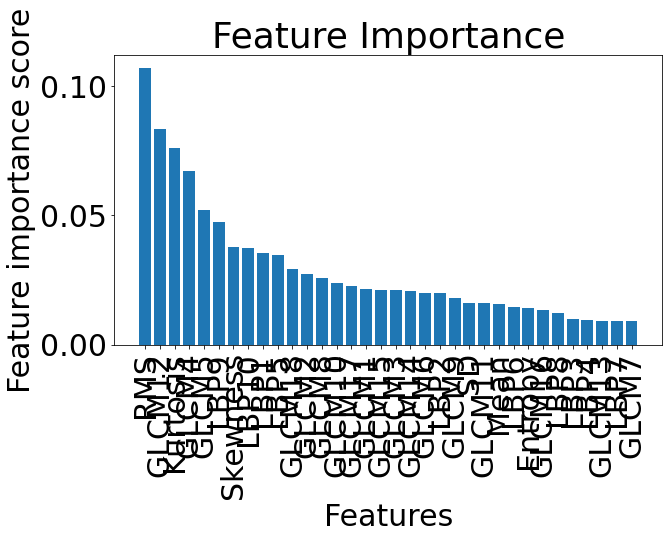

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature importance score")
plt.tight_layout()
plt.show()



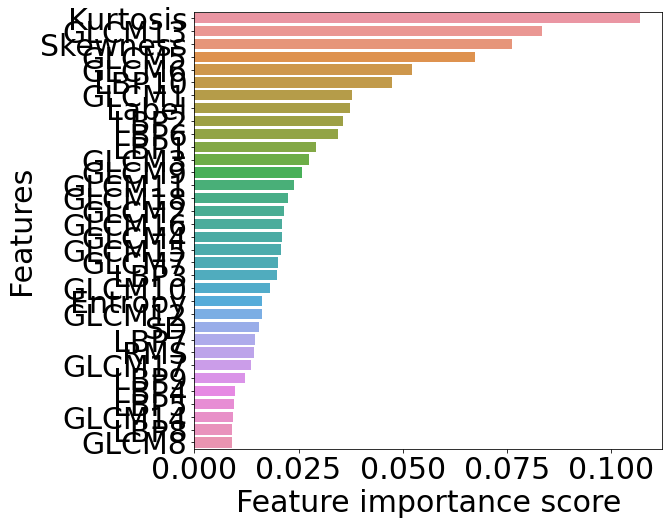

In [51]:
#Plot Searborn bar chart
plt.figure(figsize=(10,8))
sns.barplot( x=importances[sorted_indices],y=feat_labels[sorted_indices])
plt.ylabel("Features")
plt.xlabel("Feature importance score")
plt.tight_layout()
plt.show()

SHAP Summary Plot
SHAP values of a model’s output explain how features impact the output of the model.

In [52]:
import shap

# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X)

In this plot, the impact of a feature on the classes is stacked to create the feature importance plot. Thus, if you created features in order to differentiate a particular class from the rest, that is the plot where you can see it. In other words, the summary plot for multiclass classification can show you what the machine managed to learn from the features.

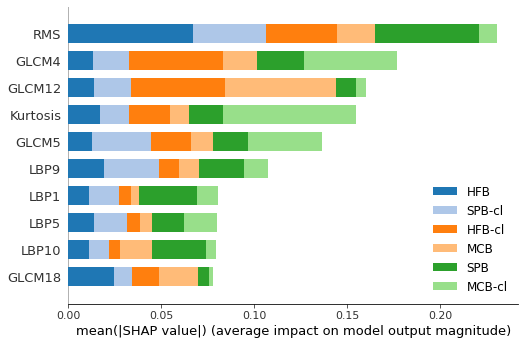

In [53]:
import numpy as np
shap.initjs()
import matplotlib.pyplot as plt
#class_names = ['HFB', 'MCB', 'PAB', 'SAB','SPB']
#fig = plt.figure()
# Set general font size
plt.rcParams.update({'font.size': 40})
font = {'size' : 30}
plt.rc('font', **font)
class_names = ['HFB','SPB','MCB','HFB-cl', 'SPB-cl','MCB-cl']
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns,color=plt.get_cmap("tab20"),alpha=0.5,max_display=10,show=False)
feature_names = X.columns
#feature_names 

#shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
#shap.summary_plot(shap_values, X_train)
 
#plt.xlabel('mean SHAP value',fontsize =20)
#plt.ylabel('feature_names',fontsize =20)
plt.show()
#ax.legend(fontsize=18)
#plt.xlabel('First principal component',fontsize=18) 
#plt.ylabel('Second principal component',fontsize=18)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data1 = pd.read_csv('ExtractedFeatures_standardized_monoB_clinical_Testing_inVitro_800_SepLabel2_SPB_only.csv')
#data1 = pd.read_csv('test1.csv')
#Label = ['HFB-hh', 'MCB-hh', 'SPB-hh']


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("Paired")

sns.violinplot(x='Feature', y='Value',data=data1, linewidth = 1.5,hue ='Label', split=True, inner='quartile',palette='Set1',alpha = .5)
plt.show()
data1

ValueError: Could not interpret input 'Feature'

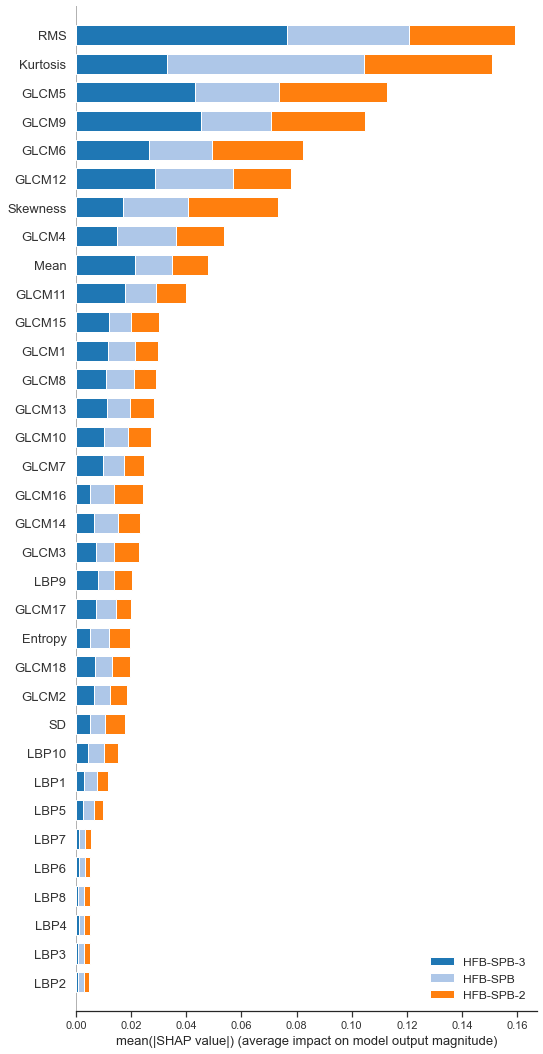

In [13]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns,color=plt.get_cmap("tab20"),alpha=0.5,max_display=34)


# SHAP Dependence Plot

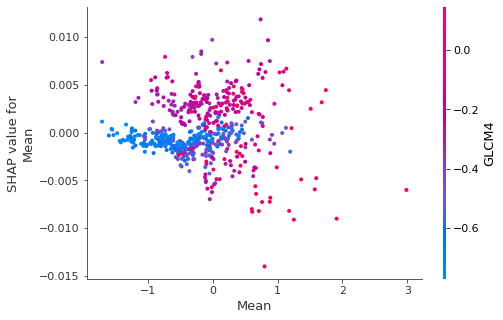

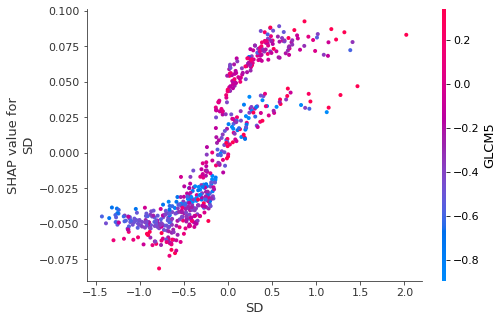

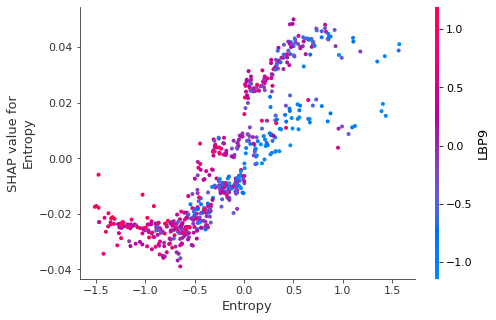

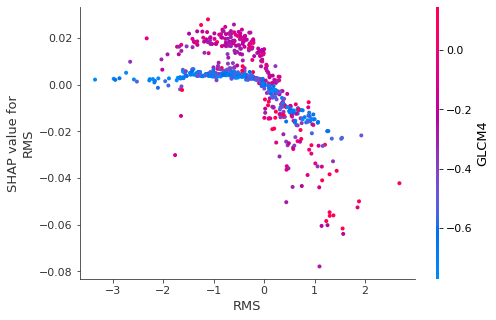

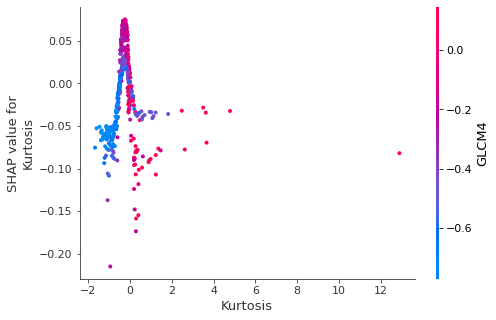

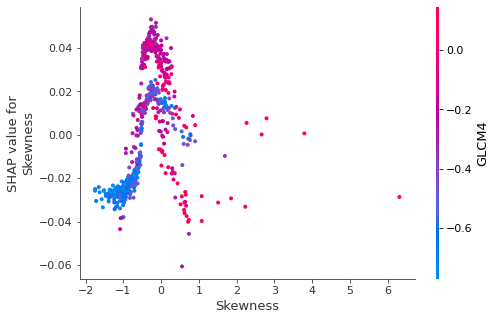

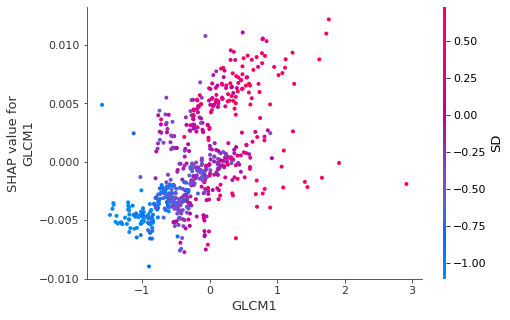

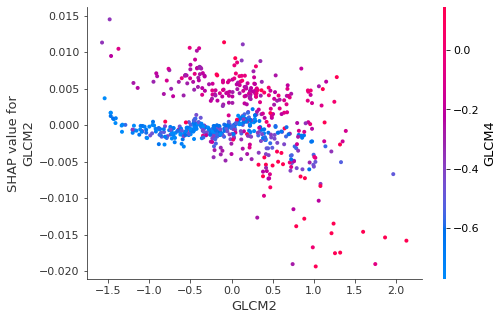

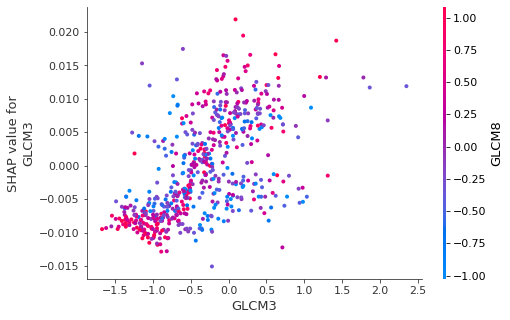

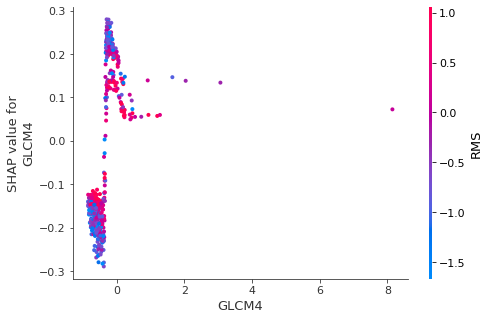

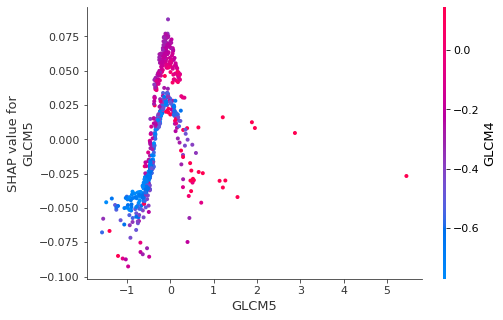

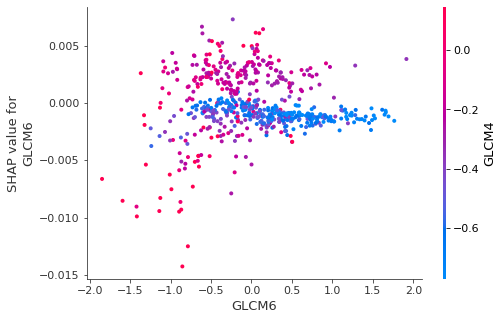

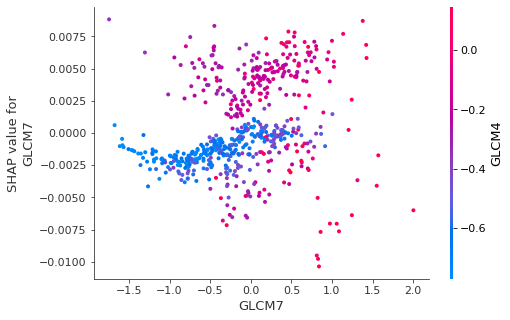

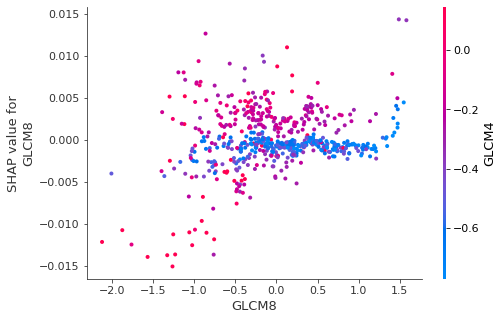

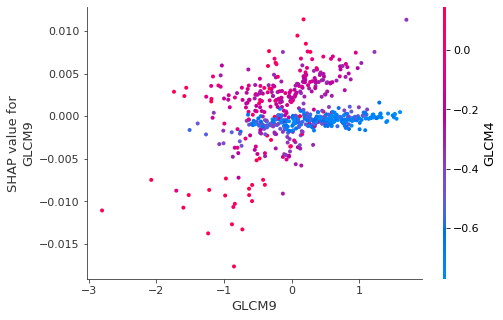

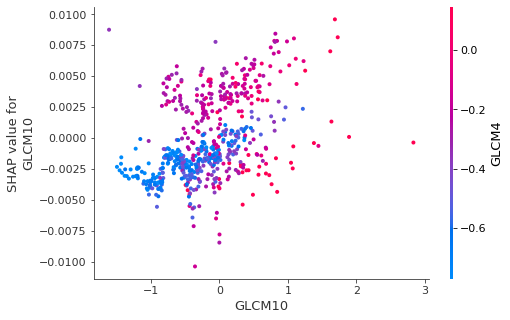

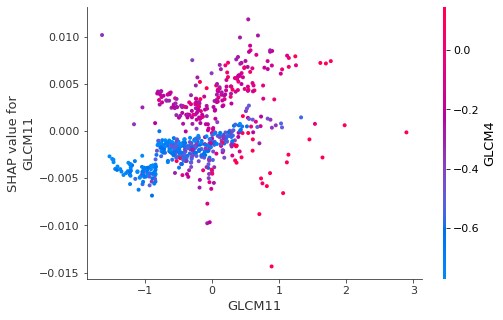

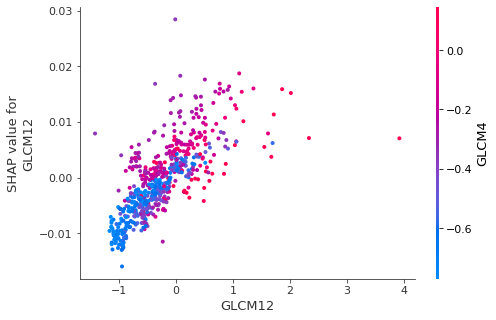

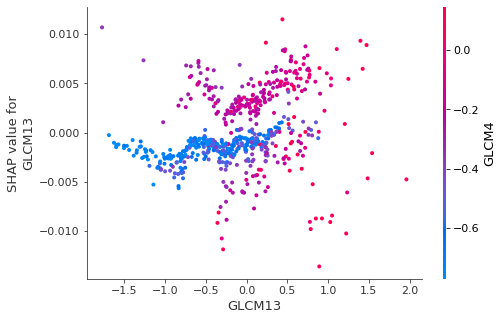

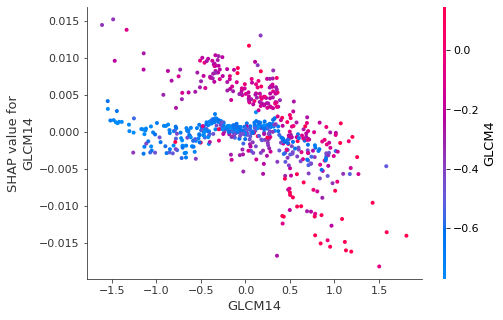

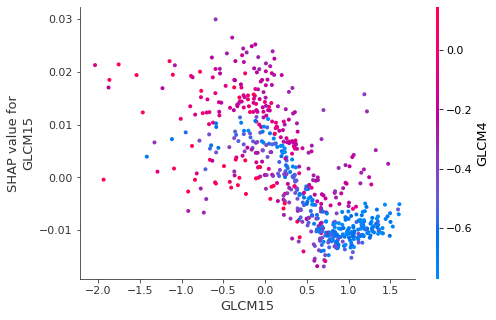

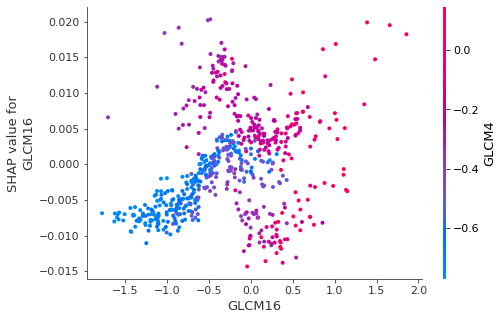

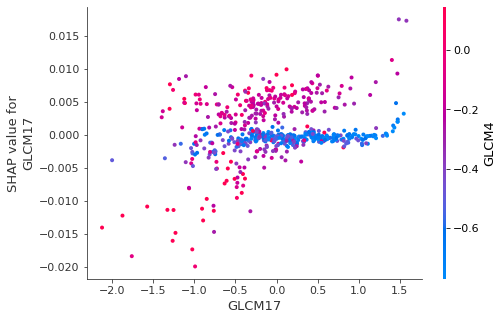

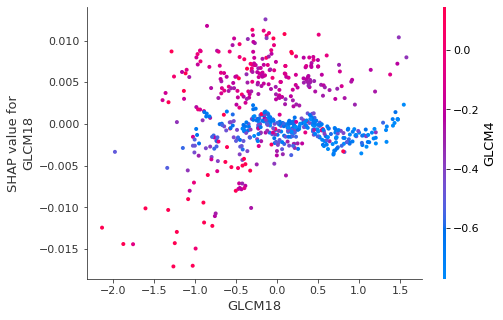

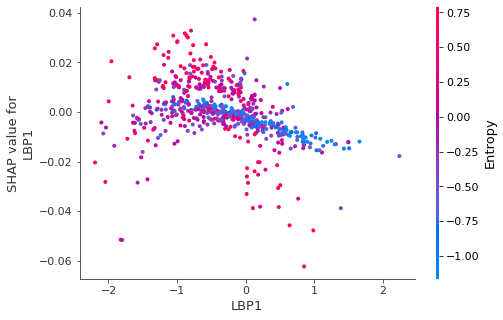

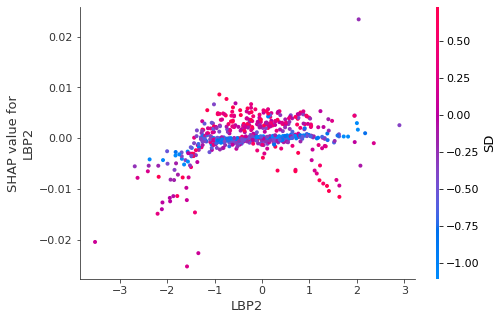

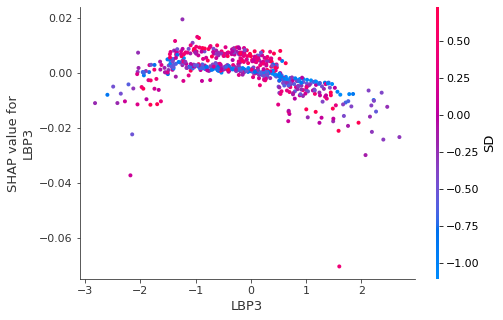

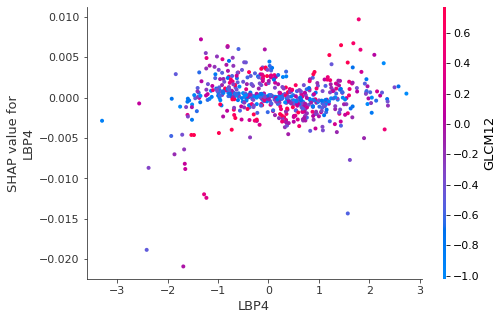

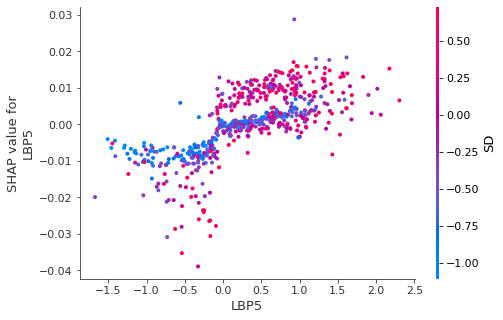

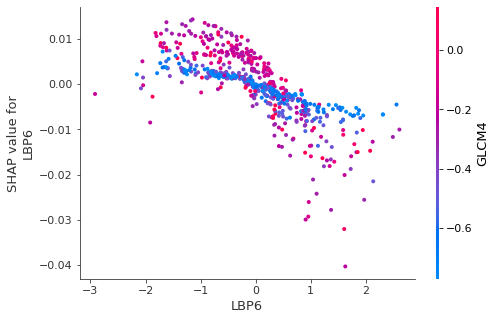

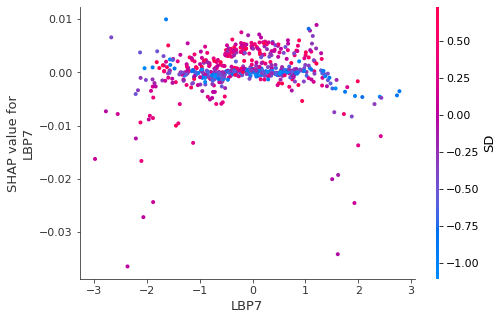

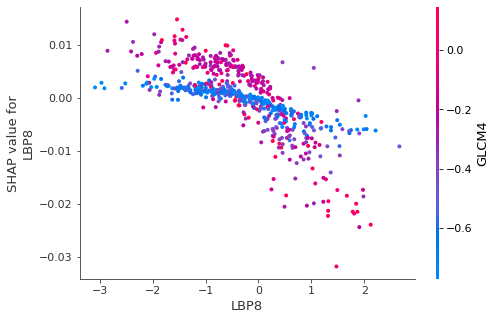

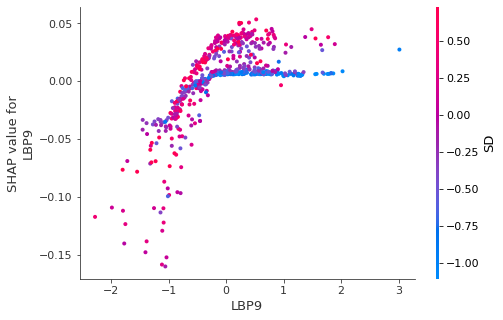

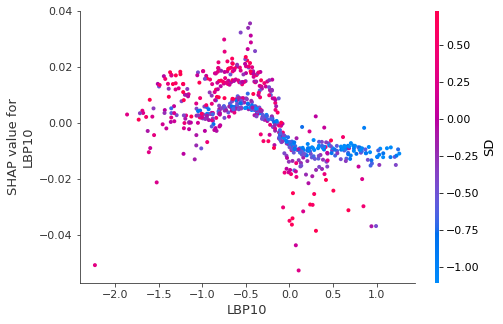

In [54]:
#If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
#shap.dependence_plot(0, shap_values[0], X.values, feature_names=X.columns)



for name in X.columns:
    shap.dependence_plot(name, shap_values[0], X, display_features=X.values)

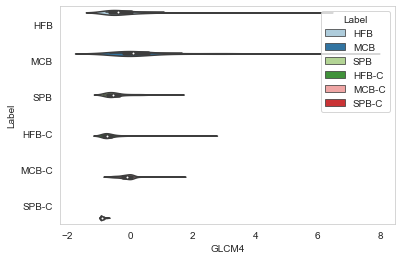

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data1 = pd.read_csv('ExtractedFeatures_standardized_monoB_clinical_Testing_inVivo_inVitro_SepLabel.csv')
#Label = ['HFB-hh', 'MCB-hh', 'SPB-hh']


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("Paired")

sns.violinplot(x='GLCM4', y='Label',data=data1, linewidth = 1.5,hue ='Label')
plt.show()



In [31]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the

In [45]:
tip = sns.load_dataset('tips')
tip

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<AxesSubplot:xlabel='day', ylabel='tip'>

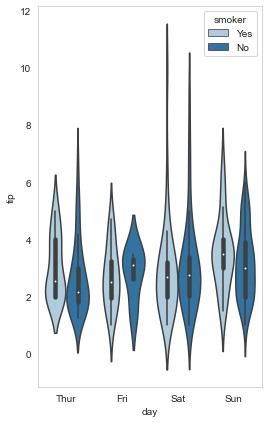

In [48]:

# loading data-set
tip = sns.load_dataset('tips')
plt.figure(figsize=(4,7))
sns.violinplot(x ='day', y ='tip', data = tip,hue='smoker')

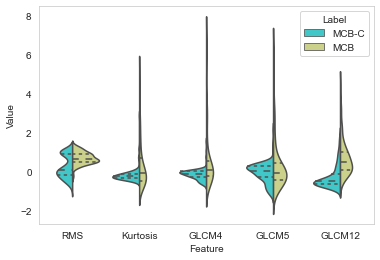

Value Feature  Label
0     0.939704     RMS  MCB-C
1     0.918445     RMS  MCB-C
2     0.953973     RMS  MCB-C
3     0.903316     RMS  MCB-C
4     0.894354     RMS  MCB-C
...        ...     ...    ...
1995  0.082129  GLCM12    MCB
1996 -0.114939  GLCM12    MCB
1997 -0.253418  GLCM12    MCB
1998  0.605792  GLCM12    MCB
1999  2.397631  GLCM12    MCB

[2000 rows x 3 columns]

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#data1 = pd.read_csv('SPB_C_inVtro.csv')
data1 = pd.read_csv('MCB_C_inVtro.csv')
#Label = ['HFB-hh', 'MCB-hh', 'SPB-hh']


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("Paired")

sns.violinplot(x='Feature', y='Value',data=data1, linewidth = 1.5,hue ='Label', split=True, inner='quartile',palette='rainbow',alpha = .5)
plt.show()
data1

#sns.violinplot(x='Feature', y='Value',data=data1, linewidth = 1.5,hue ='Label', split=True, inner='quartile',palette='Set2',alpha = .65)
#plt.show()

In [58]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the

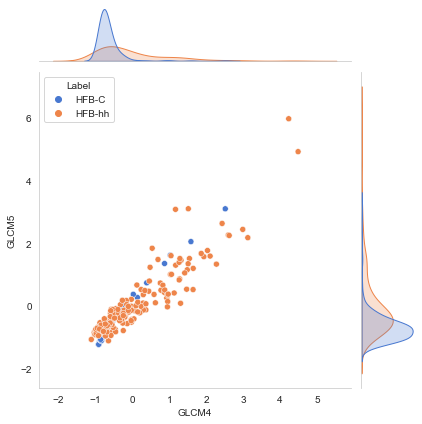

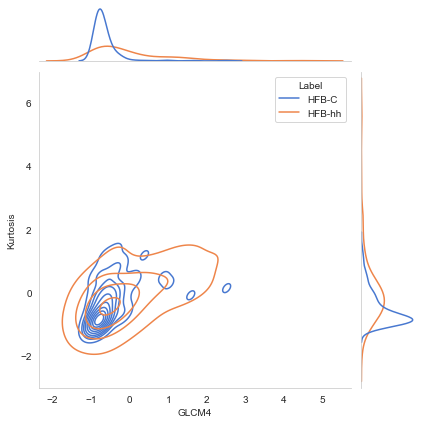

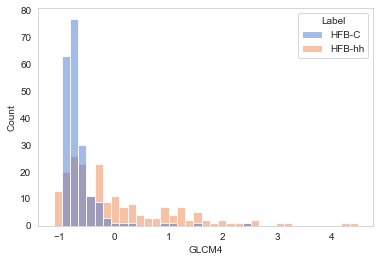

In [3]:
data1 = pd.read_csv('ExtractedFeatures_standardized_monoB_clinical_Testing_inVitro_800_SepLabel2_HFB_only.csv')
data2= data1.drop('Label',axis=1)
Y = data1['Label']
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("muted")
sns.jointplot( x='GLCM4', y='GLCM5',data=data1,hue='Label')
plt.show()
data2
sns.jointplot( x='GLCM4', y='Kurtosis',data=data1,hue='Label', kind="kde")
plt.show()
sns.histplot(data=data1, x="GLCM4", hue="Label")
plt.show()

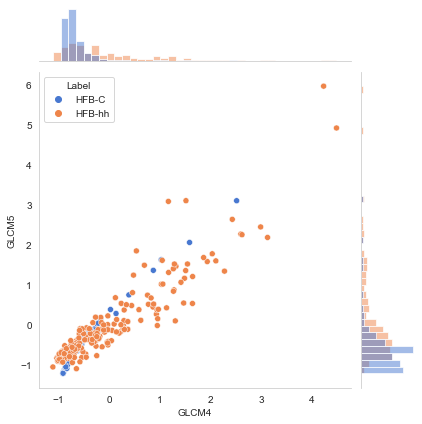

In [4]:
g = sns.JointGrid(data=data1, x="GLCM4", y="GLCM5", hue="Label")
g.plot(sns.scatterplot, sns.histplot)



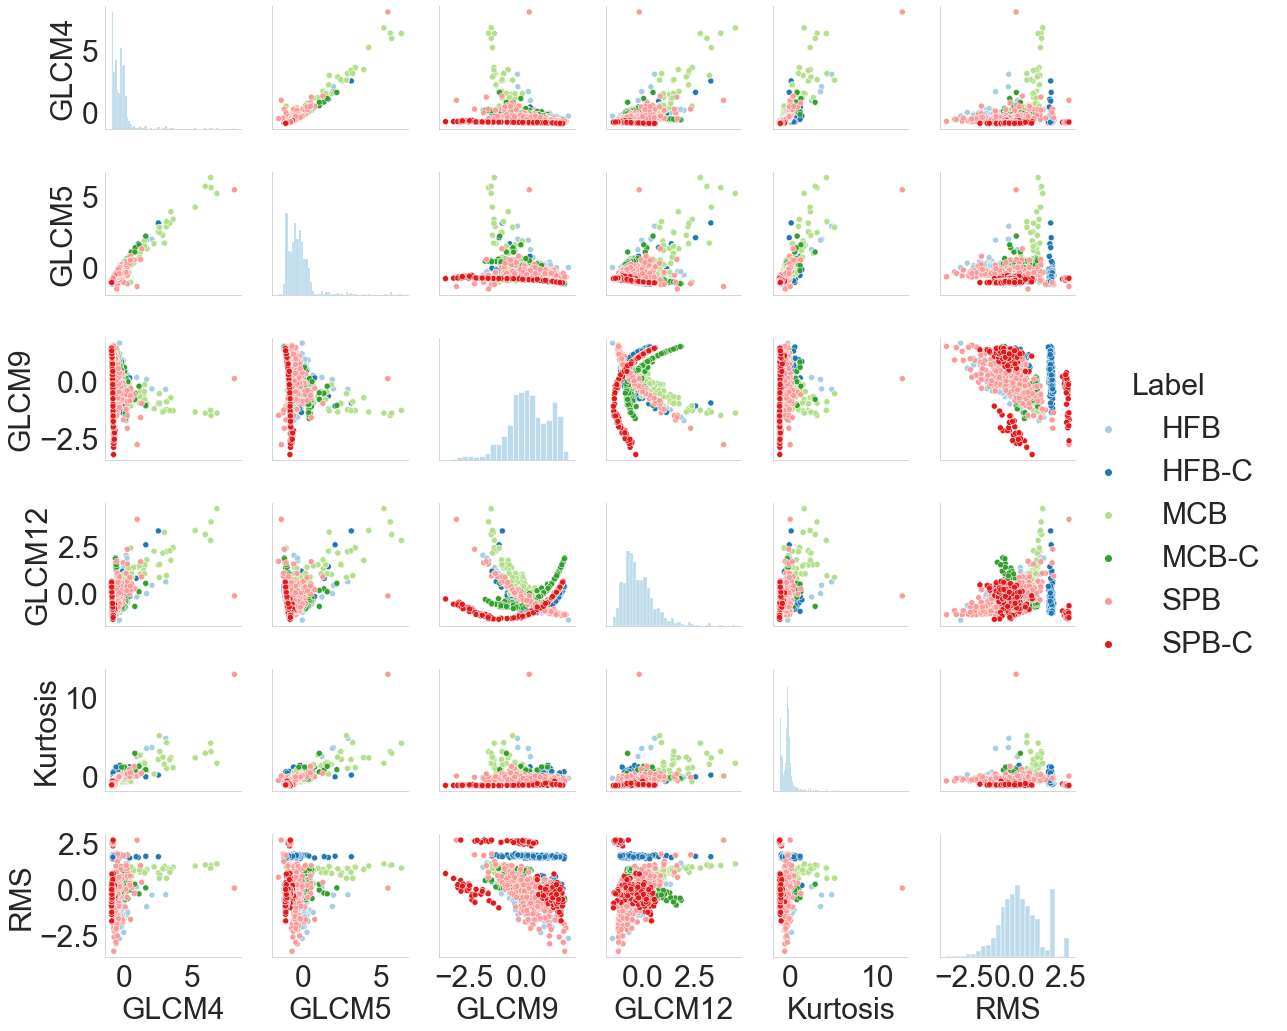

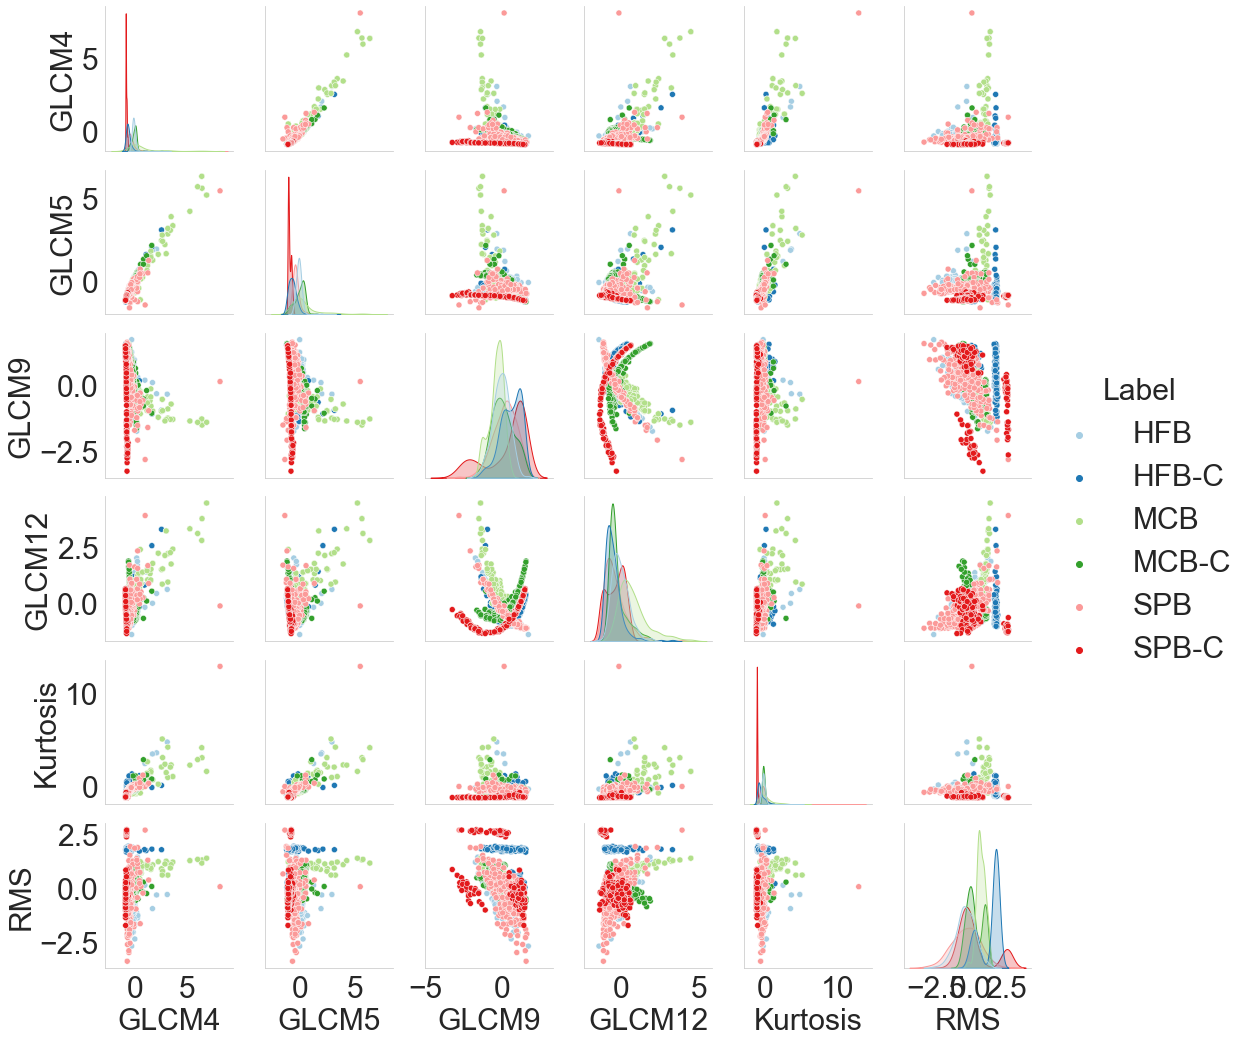

In [79]:
variables = ["GLCM4", "GLCM5","GLCM9","GLCM12","Kurtosis", "RMS",]
g = sns.PairGrid(data1, hue="Label",vars=variables)
g.map_diag(sns.histplot,hue=None)
g.map_offdiag(sns.scatterplot)
g.add_legend()


sns.pairplot(data1, hue="Label",vars=variables)


#g = sns.PairGrid(data1, hue="Label",vars=variables)
#g.map_diag(sns.histplot, multiple="stack", element="step")
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

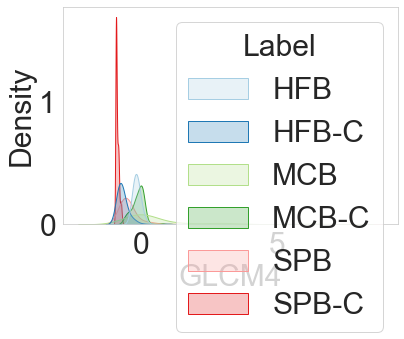

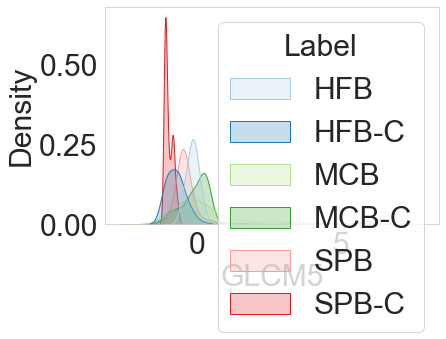

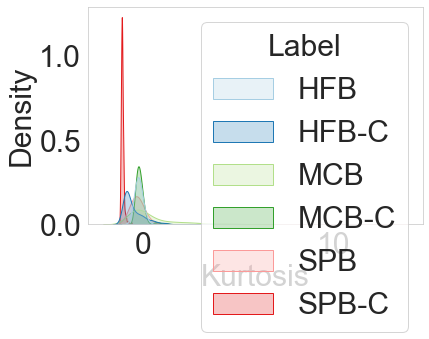

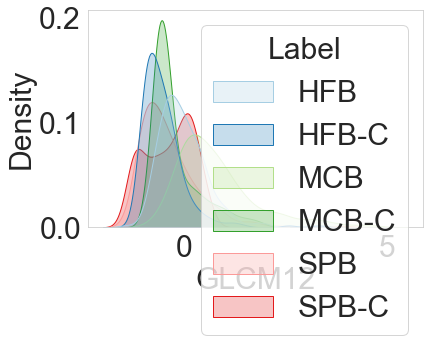

In [77]:
sns.kdeplot(data=data1, x="GLCM4", hue="Label", shade=True, color="b")
plt.show()
sns.kdeplot(data=data1, x="GLCM5", hue="Label", shade=True, color="b")
plt.show()
sns.kdeplot(data=data1, x="Kurtosis", hue="Label", shade=True, color="b")
plt.show()
sns.kdeplot(data=data1, x="GLCM12", hue="Label", shade=True, color="b")
plt.show()

#sns.kdeplot(data=data1, x="GLCM12", hue="Label", multiple="stack")
#plt.show()

In [7]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analagous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that

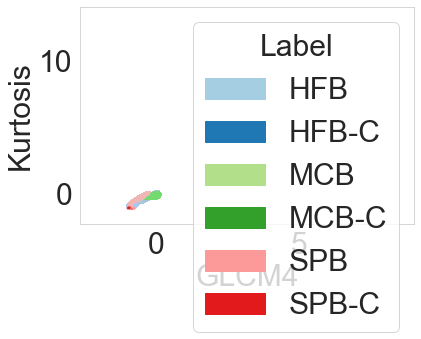

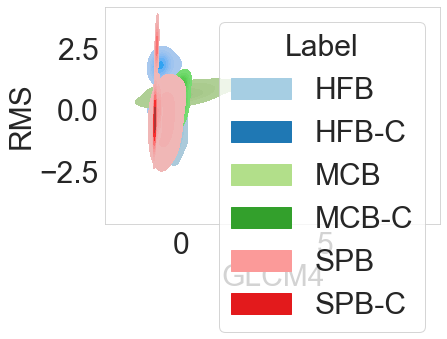

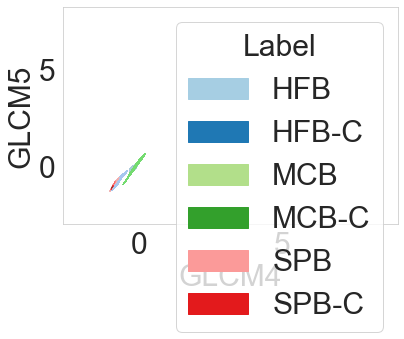

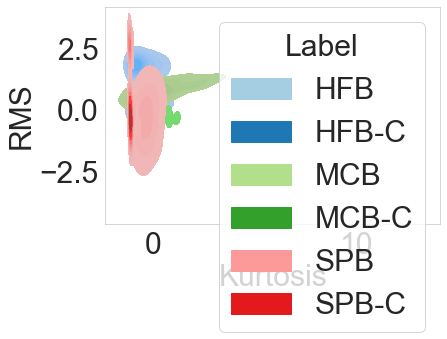

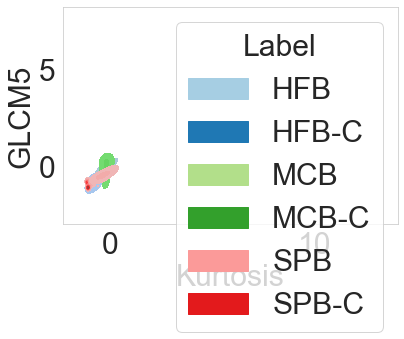

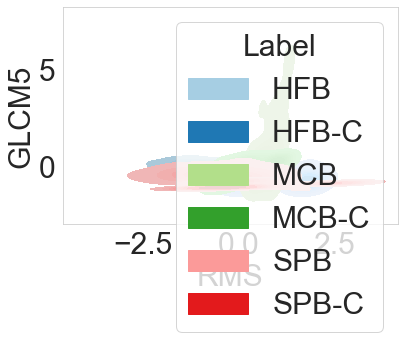

In [78]:

sns.kdeplot(data=data1, x="GLCM4", y="Kurtosis", hue="Label", fill=True)
plt.show()
sns.kdeplot(data=data1, x="GLCM4", y="RMS", hue="Label", fill=True)
plt.show()
sns.kdeplot(data=data1, x="GLCM4", y="GLCM5", hue="Label", fill=True)
plt.show()
sns.kdeplot(data=data1, x="Kurtosis", y="RMS", hue="Label", fill=True)
plt.show()
sns.kdeplot(data=data1, x="Kurtosis", y="GLCM5", hue="Label", fill=True)
plt.show()
sns.kdeplot(data=data1, x="RMS", y="GLCM5", hue="Label", fill=True)
plt.show()

We can also see the summary_plot of a specific class.The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. We can see the first most important 20 features here. Of them LBP4 has the least important feature, has low Shapley values. The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

In the summary plot, we see the first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

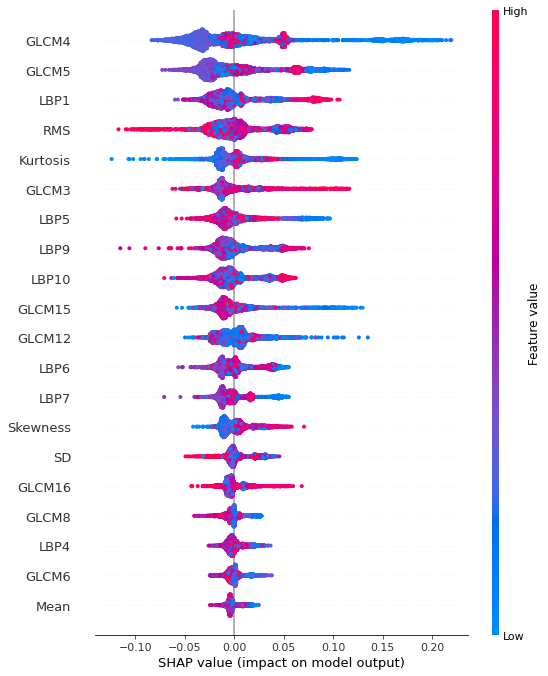

In [25]:
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)

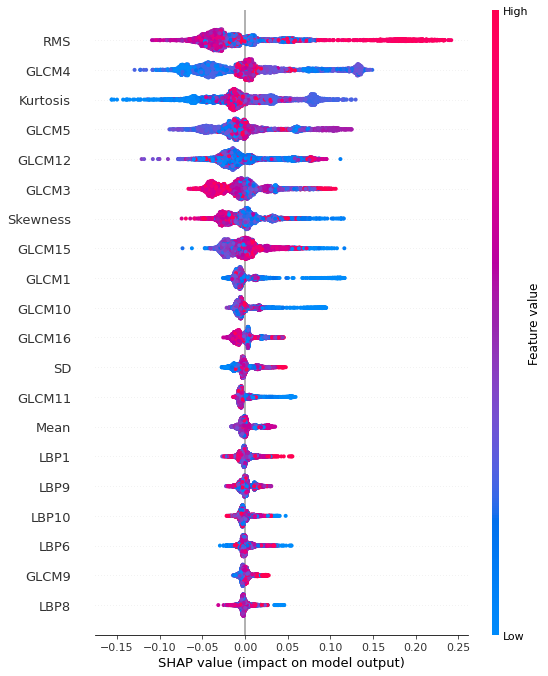

In [18]:
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

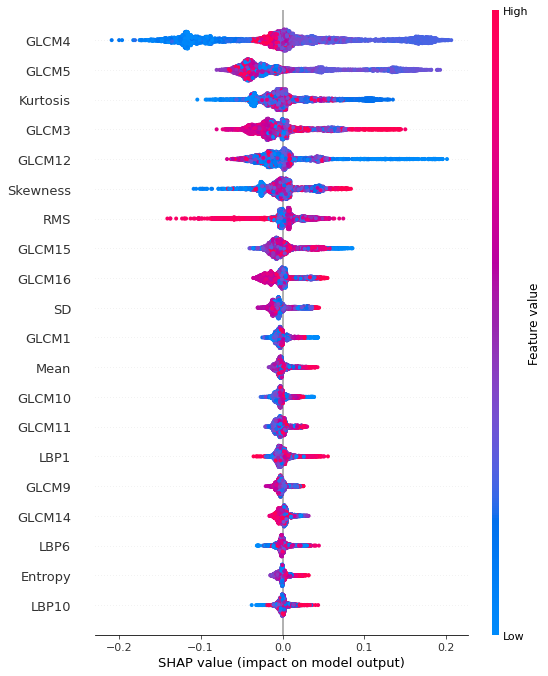

In [19]:
shap.summary_plot(shap_values[2], X.values, feature_names = X.columns)

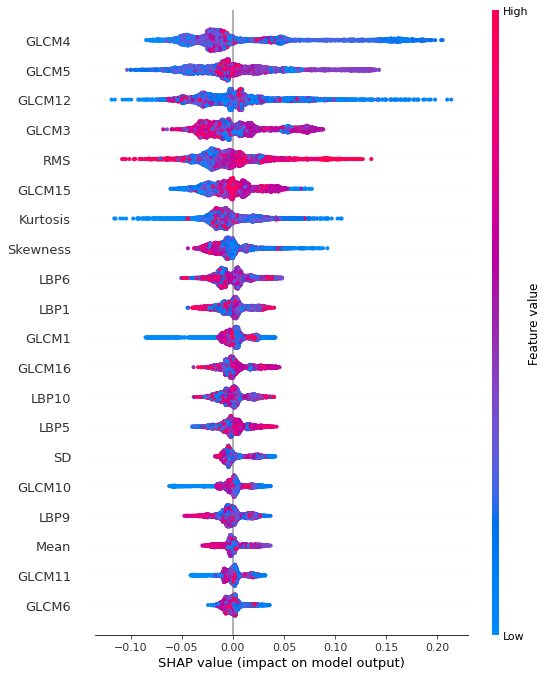

In [20]:
shap.summary_plot(shap_values[3], X.values, feature_names = X.columns)

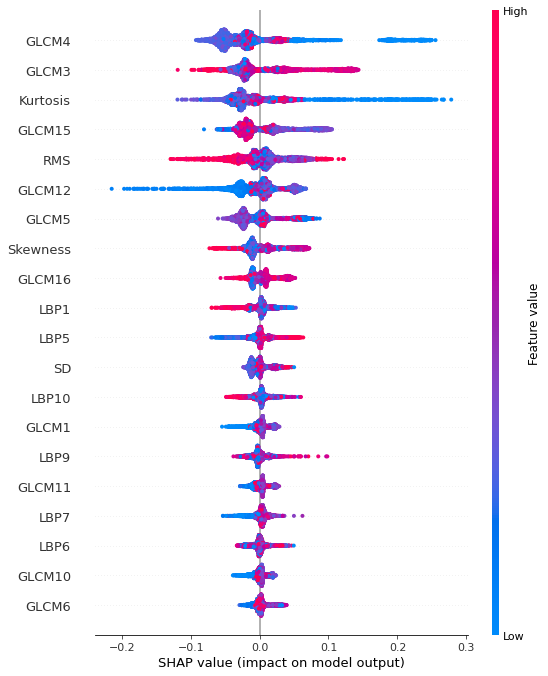

In [21]:
shap.summary_plot(shap_values[4], X.values, feature_names = X.columns)

# Predictions and model evaluation

In [23]:
predictions = rfc.predict(X_test)

Now create a classification report from the results.

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         HFB       0.81      0.98      0.89       200
         MCB       0.92      0.76      0.83       200
         PAB       0.88      0.99      0.93       200
         SAB       0.93      0.76      0.84       200
         SPB       0.96      0.98      0.97       200

    accuracy                           0.89      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.89      0.89      1000



Show the Confusion Matrix for the predictions.

In [26]:
print(confusion_matrix(y_test,predictions))

[[196   0   0   3   1]
 [ 12 152  28   8   0]
 [  0   2 198   0   0]
 [ 29  12   0 152   7]
 [  4   0   0   0 196]]


In [27]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.672 0.95  0.92  0.933 0.804]
Cross validation accuracy: 0.86


In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.8940


# XGBOOST feature importance

In [15]:
from matplotlib import pyplot as plt

import pandas as pd
import xgboost as xgb

import sklearn.metrics
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

import time

In [23]:
data1 = pd.read_csv('ExtractedFeatures_clinical_HFB_SPB_mixed.csv')

In [24]:
low_cardinality_cols = [cname for cname in data1.columns if 
                                data1[cname].nunique() < 10] #and
                                #X[cname].dtype == "object"]

numeric_cols = [cname for cname in data1.columns if 
                                data1[cname].dtype in ['int64', 'float64']]
#print(low_cardinality_cols)
#print(numeric_cols)

In [25]:
X = data1.drop('Label',axis=1)
y = data1['Label']
y1 = y.astype("category").cat.codes
data_dmatrix = xgb.DMatrix(data=X,label=y1,feature_names=X.columns)
#X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.30, random_state=101)


X_train = X #training data
y_train = y1 #training label
X_train
y_train

0      1
1      1
2      1
3      1
4      1
      ..
595    0
596    0
597    0
598    0
599    0
Length: 600, dtype: int8

In [45]:
data2 = pd.read_csv('ExtractedFeatures_standardized_TM_normal_inflammed.csv.csv')
X2 = data2.drop('Label',axis=1)
y2 = data2['Label']
y3 = y2.astype("category").cat.codes
data_dmatrix2 = xgb.DMatrix(data=X2,label=y3,feature_names=X2.columns)
X_test = X2 #testing data
y_test = y3 #testing label
X_test
y_test

FileNotFoundError: [Errno 2] File ExtractedFeatures_standardized_TM_normal_inflammed.csv.csv does not exist: 'ExtractedFeatures_standardized_TM_normal_inflammed.csv.csv'

In [26]:
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
       
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, ...)

{0: 'Mean', 1: 'SD', 2: 'Entropy', 3: 'RMS', 4: 'Kurtosis', 5: 'Skewness', 6: 'GLCM1', 7: 'GLCM2', 8: 'GLCM3', 9: 'GLCM4', 10: 'GLCM5', 11: 'GLCM6', 12: 'GLCM7', 13: 'GLCM8', 14: 'GLCM9', 15: 'GLCM10', 16: 'GLCM11', 17: 'GLCM12', 18: 'GLCM13', 19: 'GLCM14', 20: 'GLCM15', 21: 'GLCM16', 22: 'GLCM17', 23: 'GLCM18', 24: 'LBP1', 25: 'LBP2', 26: 'LBP3', 27: 'LBP4', 28: 'LBP5', 29: 'LBP6', 30: 'LBP7', 31: 'LBP8', 32: 'LBP9', 33: 'LBP10'}


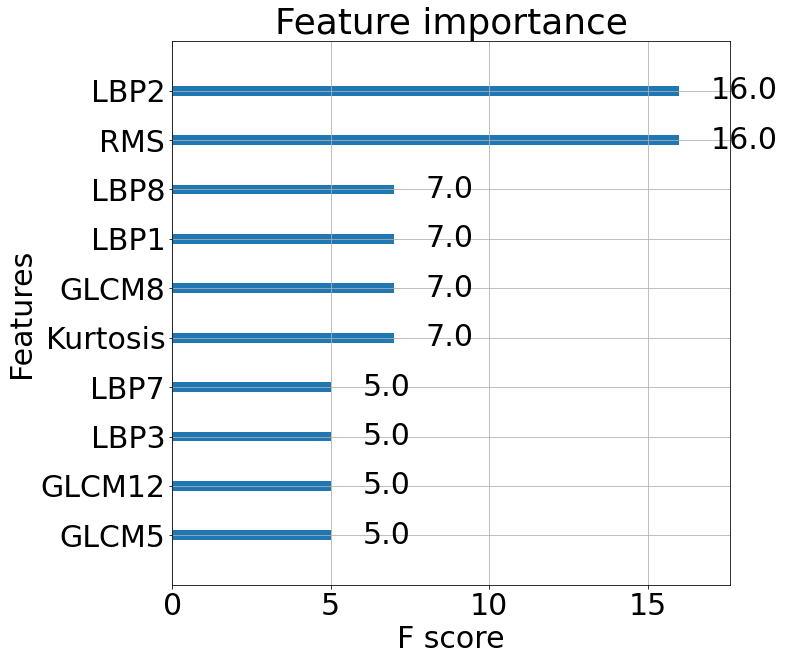

In [27]:
# create dict to use later
myfeatures = X.columns
dict_features = dict(enumerate(myfeatures))

# feat importance with names f1,f2,...
fig, ax = plt.subplots(1,1,figsize=(10,10))
axsub = xgb.plot_importance(xgb_clf, max_num_features=10, ax=ax )

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(myfeatures))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
#lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()

In [28]:
import shap

# compute SHAP values
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X)
shap_values

[array([[ 0.        ,  0.        ,  0.        , ...,  0.10600682,
         -0.00144614,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.09208725,
         -0.00512161,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.13077717,
         -0.00512161,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.17135742,
         -0.00144614,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.12466992,
         -0.00068093,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.21319112,
         -0.00068093,  0.        ]], dtype=float32),
 array([[-0.00154003, -0.00406017,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.00458055, -0.0016428 ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.00154003, -0.0034622 ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.00079372, -0.00947716,  0. 

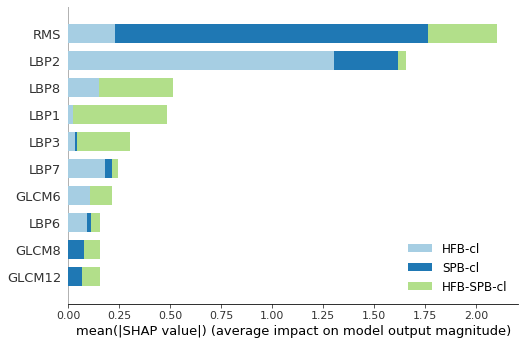

In [29]:
#class_names = ['HFB', 'MCB', 'PAB', 'SAB','SPB']
#shap.summary_plot(shap_values, X_test, class_names= class_names)

#class_names = ['HFB', 'MCB', 'PAB', 'SAB','SPB']
class_names = ['HFB-cl', 'SPB-cl', 'HFB-SPB-cl']
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns,color=plt.get_cmap("Paired"),alpha=0.5,max_display=10)



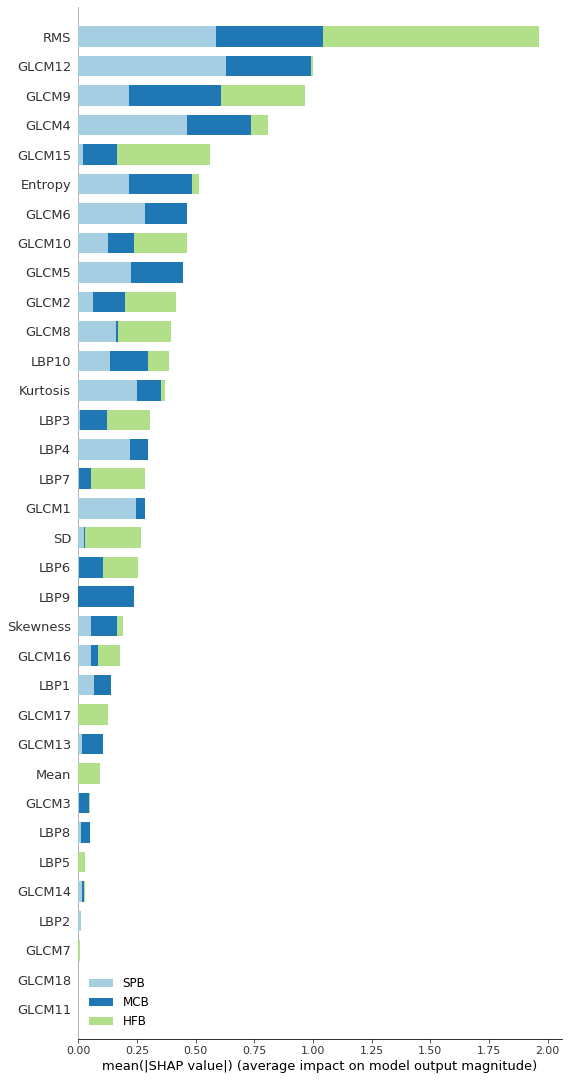

In [155]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns,color=plt.get_cmap("Paired"),alpha=0.5,max_display=34)



Layered violin plots: Here, red represents large values of a variable, and blue represents small ones. So, it becomes clear that large values of GLCM4 do indeed increase the prediction, and vice versa. You can also see that others (like LBP1) are pretty evenly split, which indicates that while overall they’re still important, their interaction is dependent on other variables. (After all, the whole point of a tree model like xgboost is to capture these interactions, so we can’t expect to see everything in a single dimension!)

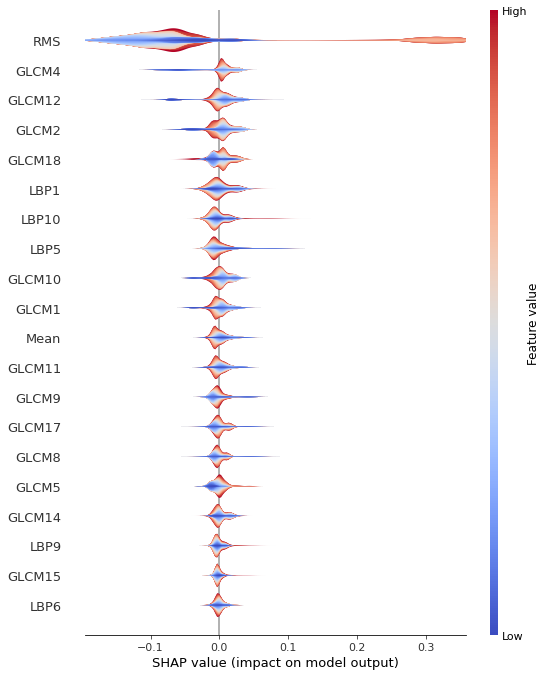

In [27]:
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns, plot_type="layered_violin", color='coolwarm')

Violin plot
These are a standard violin plot but with outliers drawn as points. This gives a more accurate representation of the density out the outliers than a kernel density estimated from so few points. The color represents the average feature value at that position, so red regions have mostly high valued feature values while blue regions have mostly low feature values.

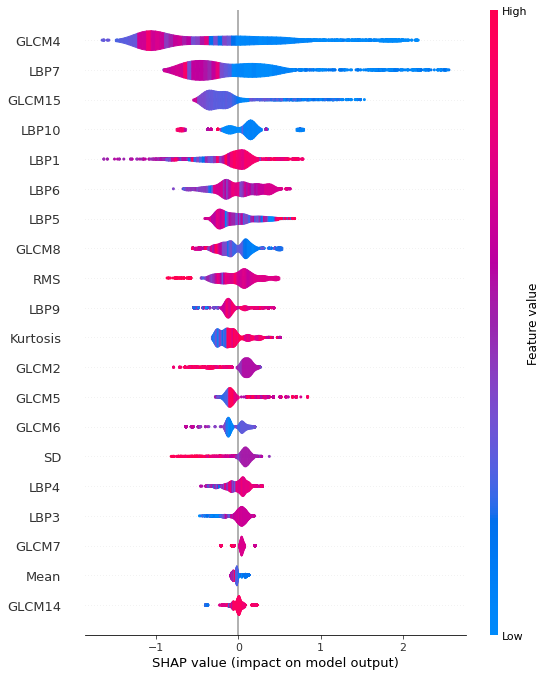

In [40]:
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns, plot_type="violin")

Dot plot
This combines a scatter plot with density estimation by letting dots pile up when they don’t fit. The advatange of this approach is that it does not hide anything behind kernel smoothing, so what-you-see-is-what-is-there.

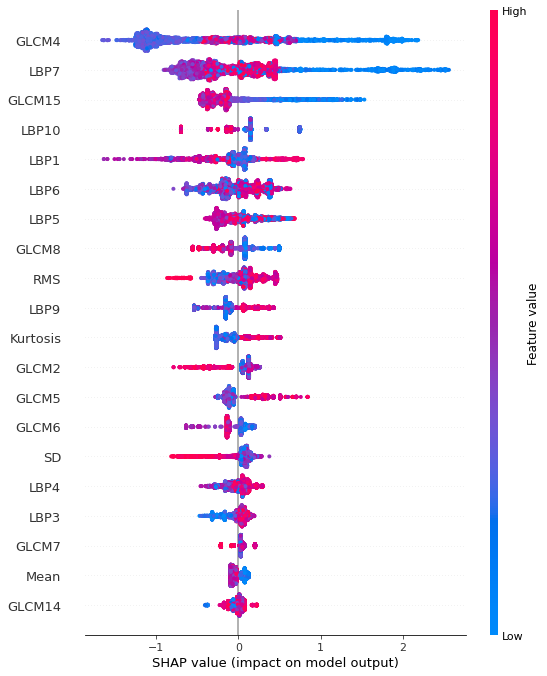

In [41]:
shap.summary_plot(shap_values[0], X.values, feature_names = X.columns)

In [42]:
preds = xgb_clf.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 87.10


In [43]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_clf, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.662 0.923 0.898 0.877 0.781]
Cross validation accuracy: 0.83


In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       200
           1       0.80      0.69      0.74       200
           2       0.85      0.98      0.91       200
           3       0.85      0.74      0.79       200
           4       0.92      0.98      0.95       200

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

